Mohamed Yunes (12331354) <br>
Omar Fedawi (12230267) <br>






# Sentiment Analysis Using Machine Learning
This project aims to study the viability of using machine learning for sentiment analysis (also known as opinion mining). We will first go in-depth with a random forest model, then explore other models. The procedure for training a model for opinion mining is as follows:


**1. Preprocessing:** <br>
After finding a suitable dataset we must prepare it for our machine learning model:
1. Importing Dataset: <br>Importing amazon kindle reviews dataset from kaggle and loading unto colab.
2. Cleaning Dataset: <br>Getting rid of unneeded data.
3. NLP Formatting: <br>Preparing data to be suitable for sentiment analysis.

**2. Training Model:** <br>
Training a Random Forest classifier model using the preprocessed dataset.

**3. Testing Model & Analyzing Results:** <br>
Testing the trained model and evaluating results
1. Testing Model: <br>Using part of the dataset as testing data to determine efficiency of model.
2. Evaluating Results:<br>Using several metrics to devaluate model performance.





---
# **Preprocessing**


## Importing the dataset

For the first step we must download a compilation of Amazon reviews with associated ratings and products. For this we are using the convenient [Amazon  Kindle Book Review dataset](https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis) provided by kaggle user Meetnagadia. <br> Kaggle makes importing datasets into a notebook very simple and straightforward:

In [ ]:
import kagglehub
path = kagglehub.dataset_download("meetnagadia/amazon-kindle-book-review-for-sentiment-analysis")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-kindle-book-review-for-sentiment-analysis


Now we must load the dataset onto a dataframe using Pandas library so we can parse through the data and prepare it for training.

In [ ]:
import pandas as pd

df = pd.read_csv(path+"/all_kindle_review .csv", low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


## Cleaning up the dataset


Now that the dataset is imported and fit into a dataframe, we can take a look at its shape. It has many attributes, but we only need the review and rating.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         11998 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


While extensive, most of these attributes are irrelevant to our study. For training the model to analyze sentiment the dataset must have only the review text as well as the rating. Anything else will confuse the model and weaken its performance, so we make a trimmed dataframe with only the text and rating columns.

In [ ]:
dfnew = df[["reviewText", "rating"]]
dfnew.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


We must also make sure there are no missing values (text or rating) since the model would not know what to do with those. We drop any rows with null values from the dataframe.

In [ ]:
dfnew.dropna(inplace=True)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  12000 non-null  object
 1   rating      12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


<ipython-input-5-5850867efc8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew.dropna(inplace=True)


Now we must convert the ratings into one of three sentiments so the

In [ ]:
def label_sentiment(rating):
    if rating <= 2:
        return 0.0 # negative rating
    elif rating == 3:
        return 1.0 # neutral rating
    return 2.0 # positive rating

# Ratings are now one of 3 sentiments: Positive, neutral, negative
dfnew.loc[:, 'rating'] = dfnew['rating'].apply(label_sentiment)
dfnew['rating'].value_counts()

,count
rating,
2,6000
0,4000
1,2000


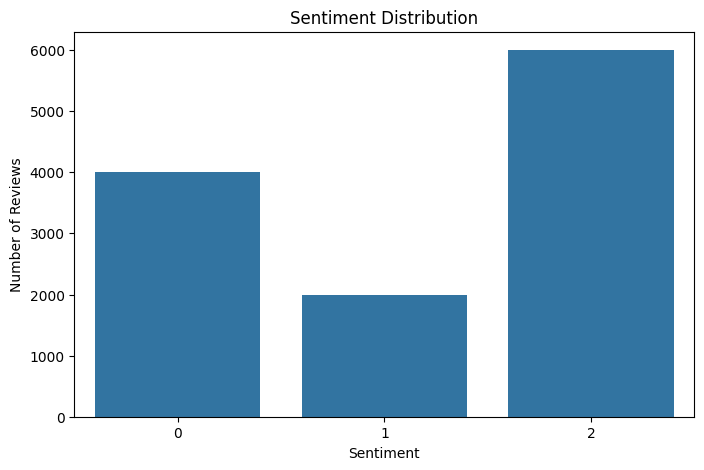

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=dfnew, x='rating')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

## NLP Formatting

Now we need to clean up the review texts so they are more understandable to the machine learning model. First we remove stop words (unimportant filler words) and then we lemmatize the words so that they return to their lexical root forms. This will allow the model to relate words between reviews much more accurately and comprehensively.

In [ ]:
# Importing NLTK library so we can clean up the review strings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Stop words are filler words that need to be removed
stop_words = set(stopwords.words('english'))
# Lemmatizer maps words to their base form based on lexicon
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(filtered_tokens)

dfnew['cleaned_review'] = dfnew['reviewText'].apply(preprocess_text)
dfnew[['cleaned_review', 'rating']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-8-4d81aa7b992a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['cleaned_review'] = dfnew['reviewText'].apply(preprocess_text)


,cleaned_review,rating
0,Jace Rankin may short nothing mess man hauled ...,1
1,Great short read I want put I read one sitting...,2
2,I start saying first four book I expecting con...,1
3,Aggie Angela Lansbury carry pocketbook instead...,1
4,I expect type book library pleased find price ...,2
...,...,...
11995,Valentine cupid Jena Ian another vampire find ...,2
11996,I read seven book series one favorite genre th...,2
11997,This book really cuppa The situation man captu...,1
11998,tried use charge kindle even register charging...,0




---


# **Training the Model**

Before training the model we must vectorize the reviews to numerically represent the text so our model can understand it. TF-IDF will do this for us.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
tfidfmatrix = vectorizer.fit_transform(dfnew['cleaned_review'])

X and Y and split into training sets (80%) and testing sets (20%):

In [ ]:
# X & Y
X = tfidfmatrix
Y = dfnew['rating']

# Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Training the model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)



---


# **Testing and Analysis**

## Testing Model

Now we use the previously assigned testing portion of the dataset

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

## Evaluating Results

After training the model on our dataset, we can evaluate several factors about the results, starting with the accuracy:

In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100) )

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       803
           1       0.44      0.01      0.02       387
           2       0.70      0.92      0.80      1210

    accuracy                           0.71      2400
   macro avg       0.62      0.55      0.51      2400
weighted avg       0.67      0.71      0.65      2400

Accuracy: 70.79%


70% accuracy is a somewhat satisfying result. <br>
However, since our dataset is a little skewed towards positive reviews, accuracy alone is not a sufficient metric for evaluating this model. We need to be sure that the model is consistently able to determine sentiment. <br> There are other metrics for assessing classification models:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: %.2f%%" % (precision*100) )
print("Recall: %.2f%%" % (recall*100) )
print("F1 Score: %.2f%%" % (f1*100) )


Precision: 66.77%
Recall: 70.79%
F1 Score: 64.66%


The precision means more true flags, the recall means less false flags, and the f1 score is a harmonic mean of the latter two. The f1 score is the most important metric when evaluating a classification model.
<br>
We can also look at the confusion matrix of the model which shows us the number of each sentiment guessed compared to the real makeup of sentiments:

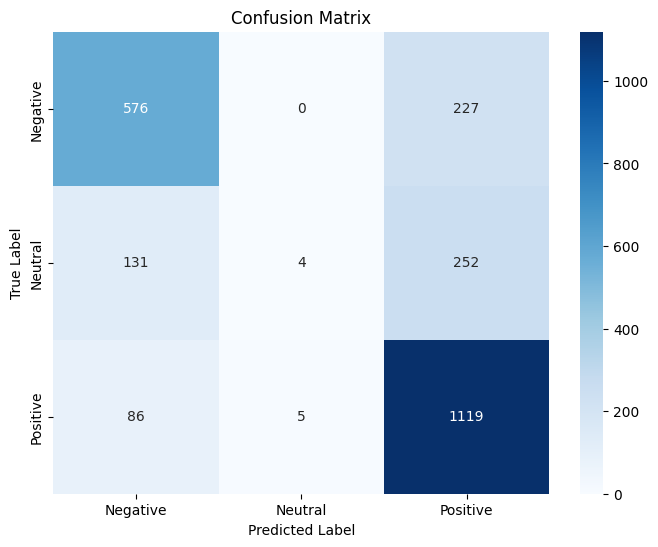

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Testing other models


We can now evaluate other machine learning models and compare:


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       803
           1       0.52      0.18      0.26       387
           2       0.77      0.91      0.83      1210

    accuracy                           0.75      2400
   macro avg       0.69      0.63      0.63      2400
weighted avg       0.73      0.75      0.72      2400

Accuracy: 75.46%
Precision: 72.80%
Recall: 75.46%
F1 Score: 72.46%


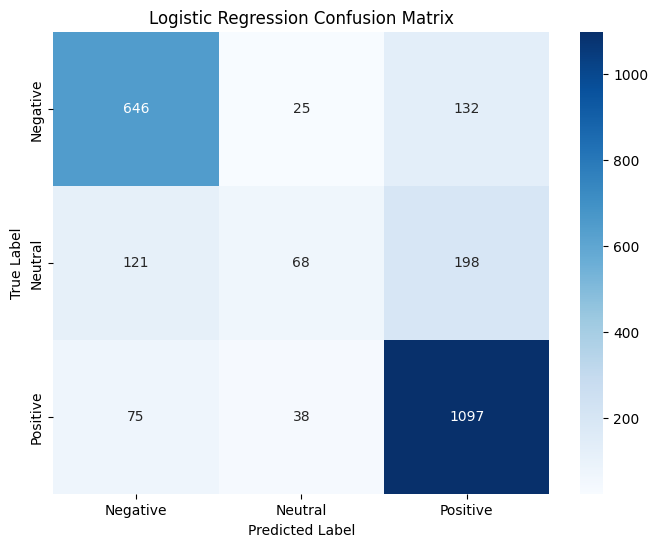

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred_lr = logistic_model.predict(X_test)

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_lr)*100) )

precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Precision: %.2f%%" % (precision_lr*100) )
print("Recall: %.2f%%" % (recall_lr*100) )
print("F1 Score: %.2f%%" % (f1_lr*100) )

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


SVM Results:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       803
           1       0.47      0.18      0.26       387
           2       0.78      0.90      0.83      1210

    accuracy                           0.75      2400
   macro avg       0.67      0.63      0.63      2400
weighted avg       0.72      0.75      0.72      2400

Accuracy: 75.08%
Precision: 72.09%
Recall: 75.08%
F1 Score: 72.35%


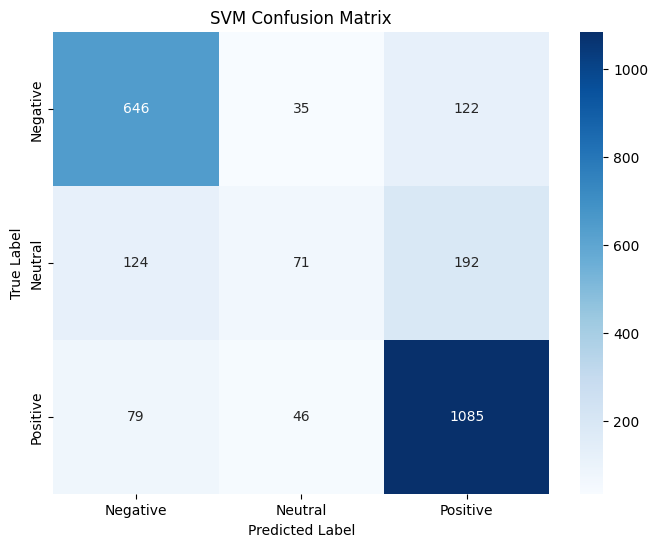

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_svm)*100) )

precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Precision: %.2f%%" % (precision_svm*100) )
print("Recall: %.2f%%" % (recall_svm*100) )
print("F1 Score: %.2f%%" % (f1_svm*100) )

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

## Evaluating the Models


In [ ]:
# Function that prepares a string for prediction
def prepare(text):
  cleaned_text = preprocess_text(text)
  vectorized_text = vectorizer.transform([cleaned_text])
  return vectorized_text

In [ ]:
sample1 = "This book was great and reading it was a very joyful experience"
sample2 = "This book was okay, I enjoyed some parts but most of it was uninteresting"
sample3 = "This book was terrible and i did not enjoy reading it"
sample4 = "Lorem Ipsum"
sample5 = "لقد استمتعت بقراءة هذا الكتاب"

def predict_results(samples, model):
  for i in samples:
    x = prepare(i)
    y = model.predict(x)[0]
    print("\t",i, y)

for m in [model, logistic_model, svm_model]:
  print(m)
  samples = [sample1, sample2, sample3, sample4, sample5]
  predict_results(samples, m)


RandomForestClassifier(random_state=42)
	 This book was great and reading it was a very joyful experience 2
	 This book was okay, I enjoyed some parts but most of it was uninteresting 2
	 This book was terrible and i did not enjoy reading it 0
	 Lorem Ipsum 2
	 لقد استمتعت بقراءة هذا الكتاب 2
LogisticRegression(max_iter=1000)
	 This book was great and reading it was a very joyful experience 2
	 This book was okay, I enjoyed some parts but most of it was uninteresting 1
	 This book was terrible and i did not enjoy reading it 0
	 Lorem Ipsum 2
	 لقد استمتعت بقراءة هذا الكتاب 2
SVC(kernel='linear')
	 This book was great and reading it was a very joyful experience 2
	 This book was okay, I enjoyed some parts but most of it was uninteresting 1
	 This book was terrible and i did not enjoy reading it 0
	 Lorem Ipsum 2
	 لقد استمتعت بقراءة هذا الكتاب 2
